# Mini-Project: Urban Land Coverage

This mini project aims to develop a machine learning model for accurately classifying various land cover types using satellite imagery. Hosted on GitHub, this project serves as a practical application of data science principles, particularly in the fields of environmental monitoring and remote sensing. The main objective is to create a robust classification model that can distinguish between different land cover categories based on satellite image data. This project highlights the application of machine learning techniques to automate the process of land cover classification, providing valuable insights for environmental analysis. The project follows a structured approach, involving data preprocessing, feature extraction, model training, and evaluation. Various machine learning algorithms are explored to identify the most effective method for accurate classification. The focus is on leveraging publicly available satellite imagery datasets to train the model, ensuring a diverse and representative sample. Data can be accesed at on Github or at UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/295/urban+land+cover. 

Accurate land cover classification is essential for a wide range of applications, including:
- **Environmental Monitoring**: Assessing changes in natural landscapes and ecosystems.
- **Urban Planning**: Providing data-driven insights for sustainable development.
- **Agriculture**: Monitoring crop types and assessing land usage.
- **Climate Studies**: Analyzing land cover changes as indicators of climate variability.

The key features of the project are:
- **Data Utilization**: The project makes use of publicly accessible satellite imagery datasets, ensuring the model is trained on a diverse range of data.
- **Machine Learning Techniques**: Multiple algorithms are implemented and compared to determine the best-performing model for land cover classification.
- **Open Source Collaboration**: By hosting the project on GitHub, it invites contributions and feedback from the data science community, promoting transparency and continuous improvement.

This project demonstrates the practical application of machine learning in solving real-world environmental challenges, showcasing the potential of data science to enhance our understanding and management of land resources.


---
## Import Essential Libraries

In [192]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

---
## Section 1: Data Preparation & Cleaning 
In this section, we aim to perform an initial exploration and assessment of the dataset, laying the groundwork for subsequent analysis and model development. The primary focus is on understanding the structure, identifying key variables, and checking data quality. This involves examining the dataset for missing values, detecting duplicates, and evaluating the data types of each column. By gaining a comprehensive overview at this stage, we can make informed decisions about necessary preprocessing steps and ensure that the dataset is well-prepared for further analysis and modeling tasks.

### Preparing the Dataframes

In this section, we begin by loading the datasets. The dataset, read from a CSV file, consists of multiple features extracted from satellite imagery, including spectral indices, texture metrics, and shape descriptors. Each row represents a unique sample, with various attributes (columns) describing the characteristics of different land cover classes.

The initial inspection of the data reveals that it contains 507 samples (rows) and 148 features (columns). The dataset includes a target variable, `class`, which categorizes each sample into one of several land cover types (e.g., concrete, shadow, tree, asphalt, building, grass). This comprehensive feature set provides a rich basis for further analysis, including feature selection and model training.

In [ ]:
# Load train data
training_data = pd.read_csv("C:/Users/user/OneDrive/Desktop/NTU/SC1015/Project/Data/train.csv")
training_data

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,...,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,...,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,...,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,...,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,asphalt,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,...,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,building,1.36,3146,0.90,244.97,1.44,1.39,229.86,252.47,252.58,...,7.58,1.51,0.63,0.84,6.85,1.96,0.47,-0.04,784,1911.96
503,grass,2.51,428,1.55,166.02,2.16,2.61,210.11,135.89,152.04,...,18.91,1.14,0.86,0.67,7.70,1.80,0.50,0.22,1020,801.65
504,concrete,2.45,659,1.38,219.30,1.68,2.53,189.64,233.14,235.12,...,14.67,2.21,0.74,0.78,7.47,1.70,0.74,-0.09,2596,1243.03
505,building,1.90,89,1.01,219.88,2.02,2.01,184.82,235.18,239.65,...,37.11,5.26,0.75,0.85,8.47,1.30,0.94,-0.12,726,1470.63


In [ ]:
# Load test data
test_data = pd.read_csv("C:/Users/user/OneDrive/Desktop/NTU/SC1015/Project/Data/test.csv")
test_data

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,car,1.43,39,1.41,234.03,1.54,1.60,206.36,246.05,249.69,...,55.92,1.73,0.65,0.81,7.05,1.89,0.42,-0.10,66,2469.69
164,soil,1.92,141,1.24,215.19,2.02,2.02,212.28,216.28,217.00,...,18.91,3.49,0.88,0.67,7.88,1.44,0.82,0.06,990,824.01
165,grass,2.97,252,1.73,164.13,3.20,3.09,184.15,152.03,156.22,...,33.52,2.02,0.86,0.71,8.50,1.82,0.54,0.06,948,821.84
166,grass,1.57,216,1.27,164.84,1.71,1.97,192.55,148.34,153.62,...,24.49,1.13,0.76,0.85,7.75,2.11,0.30,0.09,254,1580.72



This code  provides an overview of the training_data and test_dataset by first printing its overall data type (e.g., DataFrame or array) to ensure it's in the expected format. It then displays the dimensions of the dataset, indicating the number of rows (samples) and columns (features). Finally, it lists the data types of each column, which is crucial for identifying the necessary preprocessing steps based on the variable types.

In [137]:
# Display the data type of the 'training_data' object
print("Data type for training data:", type(training_data))

# Print the dimensions (rows and columns) of the 'training_data' DataFrame
print("Data dimensions for training data:", training_data.shape)

# Show the data types of each column in the 'training_data' DataFrame
print("\nData types included are:\n", training_data.dtypes)

Data type for training data: <class 'pandas.core.frame.DataFrame'>
Data dimensions for training data: (507, 148)

Data types included are:
 class             object
BrdIndx          float64
Area               int64
Round            float64
Bright           float64
                  ...   
Dens_140         float64
Assym_140        float64
NDVI_140         float64
BordLngth_140      int64
GLCM3_140        float64
Length: 148, dtype: object


In [138]:
# Display the data type of the 'test_data' object
print("Data type for training data:", type(training_data))

# Print the dimensions (rows and columns) of the ' 'test_data' DataFrame
print("Data dimensions for training data:", training_data.shape)

# Show the data types of each column in the 'test_data' DataFrame
print("\nData types included are:\n", training_data.dtypes)

Data type for training data: <class 'pandas.core.frame.DataFrame'>
Data dimensions for training data: (507, 148)

Data types included are:
 class             object
BrdIndx          float64
Area               int64
Round            float64
Bright           float64
                  ...   
Dens_140         float64
Assym_140        float64
NDVI_140         float64
BordLngth_140      int64
GLCM3_140        float64
Length: 148, dtype: object



Now we perfors a series of essential data quality checks and preprocessing steps on datasets. First, we use .isnull().sum() to identify and count missing values (NaN) in each column, helping to assess the completeness of the data. Next, it checks for duplicate rows with training_data.duplicated().sum(), which is important for ensuring data integrity. The .dropna() method is used to effectively remove rows or columns with missing values. Finally, .drop_duplicates() removes any duplicate entries from the dataset, updating the data ensure that only unique rows are retained, thus reducing potential biases in subsequent analysis or model training.

In [143]:
# Count and display the number of missing values in each column of the dataset
print(f'Number of missing value for train data for each variable below:\n{training_data.isnull().sum()}')

# Count and display the number of duplicate rows in the dataset
print(f'\nNumber of duplicated rows for train data: {training_data.duplicated().sum()}')

# There are zero! But this is for removing rows or columns with missing values
training_data.dropna()

#  There are zero! But this is to remove duplicate rows and update the dataset with the cleaned version
training_data = training_data.drop_duplicates()

Number of missing value for train data for each variable below:
class            0
BrdIndx          0
Area             0
Round            0
Bright           0
                ..
Dens_140         0
Assym_140        0
NDVI_140         0
BordLngth_140    0
GLCM3_140        0
Length: 148, dtype: int64

Number of duplicated rows for train data: 0


In [147]:
# The same is done for the test data
print(f'Number of missing values for test data for each variable below:\n{test_data.isnull().sum()}')
print(f'\nNumber of duplicated rows for test data: {test_data.duplicated().sum()}')
test_data.dropna()
test_data = test_data.drop_duplicates()

Number of missing values for test data for each variable below:
class            0
BrdIndx          0
Area             0
Round            0
Bright           0
                ..
Dens_140         0
Assym_140        0
NDVI_140         0
BordLngth_140    0
GLCM3_140        0
Length: 148, dtype: int64

Number of duplicated rows for test data: 0


### Removing Outliers

In this section, we define a function to identify and remove outliers from the numeric columns of the dataset. Outliers can significantly affect the performance of machine learning models, so handling them is an essential preprocessing step.

The function, `remove_outliers(df)`, performs the following operations:

1. **Select Numeric Columns**: We first filter the DataFrame to include only numeric columns, as outlier detection is typically performed on continuous variables.
2. **Calculate IQR for Outlier Detection**: For each numeric column, the function computes the first quartile (Q1), the third quartile (Q3), and the interquartile range (IQR). Outliers are defined as values below `Q1 - 3 * IQR` or above `Q3 + 3 * IQR`.
3. **Filter Out Outliers**: The function removes rows where the values lie outside the defined lower and upper bounds for any numeric column.
5. **Return Cleaned DataFrame**: The cleaned DataFrame is returned, free from the detected outliers.

Finally, we apply the `remove_outliers` function to our training dataset. The cleaned DataFrame is merged with the target column (`class`) to preserve the classification labels. This step helps improve the dataset quality, reducing noise and potential biases caused by extreme values.


In [150]:
def remove_outliers(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    
    # Loop through each column to remove outliers
    for col in numeric_df.columns:
        # Calculate Q1, Q3, and IQR
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers (with a factor of 3)
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        
        # Filter the DataFrame to remove outliers
        cleaned_df = numeric_df[(numeric_df[col] >= lower_bound) & (numeric_df[col] <= upper_bound)]
    return cleaned_df

In [151]:
# Apply the function to your DataFrame
cleaned_train_df = remove_outliers(training_data)

# Merge the 'class' column from the original `training_data` into the `cleaned_train_df`
cleaned_train_df['class'] = training_data.loc[cleaned_train_df.index, 'class']

# Display the cleaned DataFrame with classes
print(cleaned_train_df)

     BrdIndx  Area  Round  Bright  Compact  ShpIndx  Mean_G  Mean_R  Mean_NIR  \
0       1.32   131   0.81  222.74     1.66     2.18  192.94  235.11    240.15   
1       1.59   864   0.94   47.56     1.41     1.87   36.82   48.78     57.09   
2       1.41   409   1.00   51.38     1.37     1.53   41.72   51.96     60.48   
3       2.58   187   1.91   70.08     3.41     3.11   93.13   55.20     61.92   
4       2.60   116   2.05   89.57     3.06     3.02   73.17   94.89    100.64   
..       ...   ...    ...     ...      ...      ...     ...     ...       ...   
502     1.36  3146   0.90  244.97     1.44     1.39  229.86  252.47    252.58   
503     2.51   428   1.55  166.02     2.16     2.61  210.11  135.89    152.04   
504     2.45   659   1.38  219.30     1.68     2.53  189.64  233.14    235.12   
505     1.90    89   1.01  219.88     2.02     2.01  184.82  235.18    239.65   
506     2.48   155   1.68  225.15     2.57     2.69  192.61  239.95    242.88   

      SD_G  ...  LW_140  GL

---
## Section 2: Exploratory Data Analysis and Statistics
In this section, we dive into the exploratory data analysis (EDA) process to gain a deeper understanding of the dataset. EDA is a crucial step that involves examining the data's statistical properties, identifying underlying patterns, and discovering potential relationships between variables. It helps us detect anomalies, recognize data trends, and make informed decisions for the subsequent analysis and modeling stages.

We begin by exploring **Uni-Variate Statistics**, which focus on individual variables in isolation. This analysis provides insights into the distribution, central tendency, and spread of each feature, allowing us to assess their properties and identify any unusual behavior or outliers.

Next, we extend our analysis to **Multi-Variate Statistics**, which examine the relationships between multiple variables. By understanding these relationships, we can uncover significant correlations, dependencies, and interactions within the data, helping us identify key features that may influence the classification task.

Overall, this exploratory analysis guides the data preprocessing steps and helps in selecting the most relevant features for building effective machine learning models.

### Uni-Variate Statistics for Classes 

In this part of the analysis, we examine the distribution of the target variable (`class`) within both the training and test datasets. Understanding the distribution of classes is crucial for evaluating the balance of the dataset, which can have a significant impact on the performance of machine learning models.

We begin by using the `.describe()` method to generate descriptive statistics for the `class` column in both datasets. This provides an overview of key metrics, such as the total count of samples, the number of unique classes, the most frequent class (mode), and its frequency. The statistics help us identify any class imbalances, which may require special handling during model training. To complement the statistical summary, we also visualize the distribution of the classes using a histogram plot. The histogram offers a clear visual representation of the class frequencies, allowing us to quickly assess whether the data is skewed towards certain classes. If a significant imbalance is detected, we may need to consider resampling techniques or use model evaluation metrics that account for class imbalance.


In [ ]:
# Describe train data
training_data['class'].describe() 

count           507
unique            9
top       building 
freq             97
Name: class, dtype: object

In [160]:
# Describe test data
test_data['class'].describe() 

count        168
unique         9
top       grass 
freq          29
Name: class, dtype: object

Text(0, 0.5, 'Count')

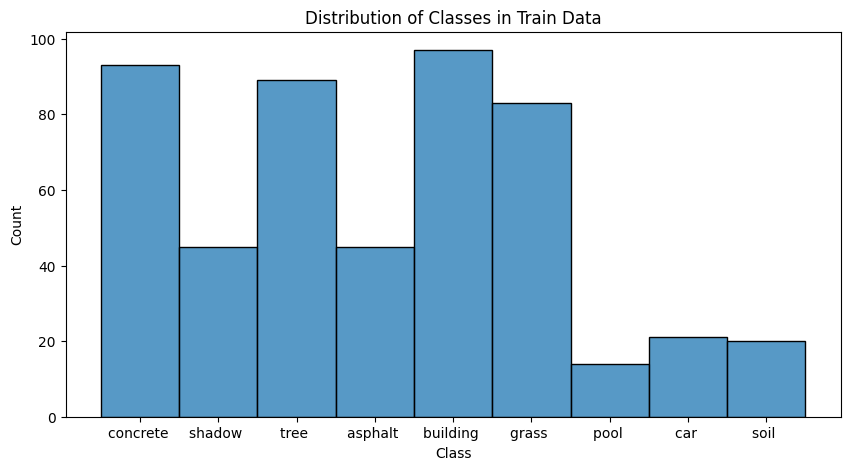

In [164]:
# Plot class histogram for train data
f = plt.figure(figsize=(10, 5))
sb.histplot(data=training_data['class'])
plt.title('Distribution of Classes in Train Data')
plt.xlabel('Class')
plt.ylabel('Count')

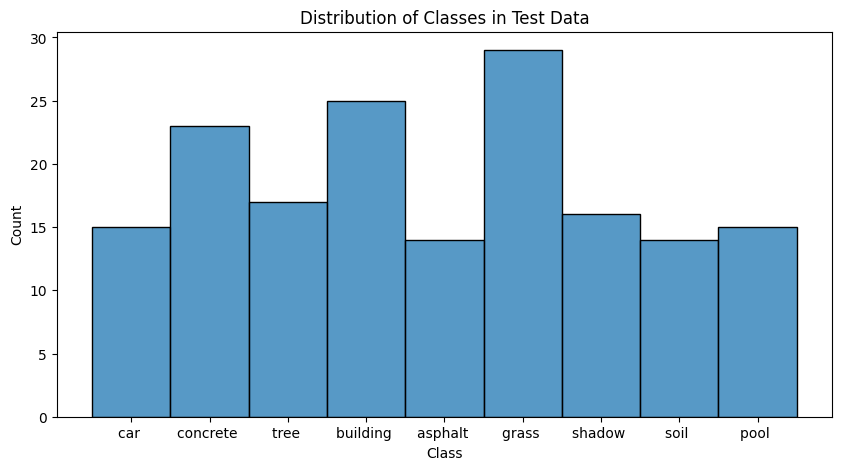

In [162]:
# Plot class histogram for test data
f = plt.figure(figsize=(10, 5))
sb.histplot(data=test_data['class'])
plt.title('Distribution of Classes in Test Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### Correlation Analysis

In this section, we focus on analyzing the relationships between numeric variables in the training dataset through correlation analysis. By examining the correlation matrix, we can identify the strength and direction of linear relationships between different features, which is a critical step in understanding the underlying patterns within the data.

We start by creating a DataFrame (`numeric_training_data`) that contains only the numeric variables from the training dataset. This allows us to easily compute summary statistics and examine the distribution of these features. Using `.describe()`, we obtain key statistical metrics such as mean, standard deviation, minimum, maximum, and quartile values for each numeric feature, helping us assess the central tendency and variability of the data.

Next, we calculate the complete correlation matrix for the numeric features using the `.corr()` method. The correlation matrix provides a comprehensive overview of the pairwise correlations between variables, with values ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation). Features that show high correlation may indicate redundancy, which could impact model performance and may require further investigation or dimensionality reduction.


In [168]:
# Create dataframes containing nummeric variables for training data
numeric_training_data = training_data.select_dtypes(include='number').copy()

In [169]:
# Summary Statistics for all numeric train Variables
numeric_training_data.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,2.025720,562.504931,1.237574,165.612939,2.187081,2.277318,166.290355,162.291953,168.256667,10.725227,...,24.601144,2.931657,0.817712,0.597732,8.048698,1.455838,0.653905,0.027436,1398.706114,1101.998185
std,0.619254,698.655240,0.561988,63.230806,0.874054,0.718441,59.217648,73.455101,69.702475,4.968761,...,12.203441,4.942887,0.106007,0.197505,0.787912,0.451781,0.251287,0.133834,1097.323462,533.927869
min,1.000000,22.000000,0.000000,26.850000,1.000000,1.040000,22.910000,26.520000,31.110000,3.550000,...,2.650000,1.000000,0.200000,0.100000,5.690000,0.240000,0.030000,-0.360000,34.000000,211.270000
25%,1.580000,159.000000,0.840000,127.485000,1.650000,1.715000,146.460000,97.585000,111.715000,6.985000,...,14.485000,1.375000,0.770000,0.455000,7.370000,1.160000,0.470000,-0.080000,601.000000,726.745000
50%,1.950000,323.000000,1.210000,170.650000,2.000000,2.180000,189.630000,158.280000,167.750000,9.290000,...,22.380000,1.920000,0.840000,0.610000,8.020000,1.440000,0.710000,-0.020000,1148.000000,1011.230000
75%,2.380000,681.500000,1.565000,224.825000,2.490000,2.675000,206.780000,237.375000,238.480000,13.330000,...,33.825000,2.800000,0.890000,0.760000,8.750000,1.775000,0.860000,0.145000,1874.000000,1335.640000
max,4.530000,5767.000000,3.520000,245.870000,8.070000,5.410000,239.370000,253.610000,253.630000,30.870000,...,61.340000,64.700000,0.970000,1.000000,9.570000,2.410000,1.000000,0.370000,8896.000000,3619.280000


In [170]:
# Calculate the complete correlation matrix
numeric_training_data.corr()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
BrdIndx,1.000000,-0.086700,0.816766,-0.109369,0.809829,0.936453,-0.026254,-0.130491,-0.137826,-0.067210,...,-0.073419,-0.052523,0.050922,-0.096810,0.004468,-0.073304,0.047360,0.088526,0.119537,-0.083757
Area,-0.086700,1.000000,-0.187530,0.318370,-0.206081,-0.076327,0.136209,0.376811,0.353616,-0.429036,...,-0.531411,0.034751,-0.606746,0.286836,-0.590834,0.136288,0.042868,-0.395051,-0.056874,0.491452
Round,0.816766,-0.187530,1.000000,-0.186799,0.873255,0.809926,-0.077275,-0.216884,-0.214164,0.101975,...,0.089149,-0.066718,0.160827,-0.139619,0.148829,-0.078569,0.023294,0.159653,0.046809,-0.162999
Bright,-0.109369,0.318370,-0.186799,1.000000,-0.168168,-0.094181,0.850414,0.971974,0.974658,-0.252268,...,-0.305885,0.019821,-0.367331,0.073476,-0.399137,0.077810,-0.059308,-0.401564,0.089090,0.320703
Compact,0.809829,-0.206081,0.873255,-0.168168,1.000000,0.817719,-0.060448,-0.199257,-0.196327,0.124356,...,0.117049,-0.053748,0.165036,-0.176521,0.158875,-0.109534,0.044727,0.170852,0.062145,-0.160977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dens_140,-0.073304,0.136288,-0.078569,0.077810,-0.109534,-0.193049,0.052035,0.080511,0.082702,-0.088543,...,-0.137128,-0.433777,-0.097508,0.698259,-0.247190,1.000000,-0.708845,-0.020341,-0.615620,0.054980
Assym_140,0.047360,0.042868,0.023294,-0.059308,0.044727,0.146839,-0.091267,-0.042609,-0.038968,-0.025690,...,-0.006584,0.368995,-0.076614,-0.184308,-0.003216,-0.708845,1.000000,-0.065706,0.310053,0.083965
NDVI_140,0.088526,-0.395051,0.159653,-0.401564,0.170852,0.071638,0.052972,-0.566212,-0.541152,0.493944,...,0.354232,-0.089675,0.566575,-0.187405,0.571453,-0.020341,-0.065706,1.000000,-0.050472,-0.551437
BordLngth_140,0.119537,-0.056874,0.046809,0.089090,0.062145,0.148900,0.099780,0.080191,0.073178,-0.113272,...,-0.062300,0.326442,0.043015,-0.550028,0.090675,-0.615620,0.310053,-0.050472,1.000000,-0.069613


### ANOVA Test

In this section, we apply Analysis of Variance (ANOVA) to evaluate the relationship between each numeric feature and the target variable (`class`). ANOVA is a statistical method used to determine whether there are significant differences between the means of multiple groups. This helps us identify features that have strong discriminative power across the different land cover classes.

1. We start by extracting the `class` column as our grouping variable.
2. For each numeric feature in the cleaned dataset, we perform a one-way ANOVA test. The data is grouped by the `class` variable, and the `f_oneway()` function from the `scipy.stats` library is used to compute the F-statistic and p-value.
3. The F-statistic indicates the variance between the groups relative to the variance within the groups. A high F-statistic suggests that the feature significantly differentiates between the classes.
4. We store the results for each feature, including the F-statistic and p-value, and then convert the results into a DataFrame for easy analysis.
5. Finally, we sort the features by their F-statistic values in descending order and display the top 10 features. These features are likely to be strong predictors for distinguishing between land cover classes.

This analysis helps in feature selection, allowing us to focus on the most relevant variables for the classification model.


In [83]:
# Extract the class column
class_column = 'class'

# Store ANOVA results
anova_results = []

# Loop through each column in the dataset (excluding the class column)
for column in cleaned_train_df.columns:
    if column != class_column:
        # Perform ANOVA test
        groups = [group[column].values for name, group in training_data.groupby(class_column)]
        f_stat, p_value = stats.f_oneway(*groups)

        # Store results
        anova_results.append({'Variable': column, 'F-statistic': f_stat, 'p-value': p_value})

# Convert results to a DataFrame
anova_df = pd.DataFrame(anova_results)

# Sort by F-statistic in descending order and get the top 5
top_5_anova = anova_df.sort_values(by='F-statistic', ascending=False).head(10)

# Print the top 5 results
print("Top 10 Variables with the Largest F-statistic:")
print(top_5_anova)


Top 10 Variables with the Largest F-statistic:
       Variable  F-statistic        p-value
7        Mean_R   491.997373  6.680246e-231
28    Mean_R_40   478.494720  3.074792e-228
8      Mean_NIR   448.897597  3.673278e-222
29  Mean_NIR_40   443.117428  6.206190e-221
49    Mean_R_60   420.817475  4.620087e-216
24    Bright_40   409.870654  1.377016e-213
3        Bright   407.509240  4.788373e-213
50  Mean_NIR_60   394.734944  4.529234e-210
70    Mean_R_80   382.739859  3.364286e-207
18         NDVI   365.757351  5.324998e-203


### Feature Selection and Multivariate Statistics

Following the ANOVA test results, we identified the top 10 features with the largest F-statistic values, indicating the most significant differences across land cover classes. From these top features, we selected the four most important variables based on their relevance and impact on class differentiation:

- **Mean_R** (Red Band Mean)
- **Mean_NIR** (Near-Infrared Band Mean)
- **Bright** (Brightness Index)
- **NDVI** (Normalized Difference Vegetation Index)

These features were chosen because they demonstrated the highest ability to distinguish between classes, as indicated by their F-statistics and low p-values.

To gain deeper insights into these selected variables, we perform a detailed multivariate analysis. This includes creating visualizations such as box plots, histograms, and violin plots to compare the distributions of these features across different land cover classes. By analyzing the spread and patterns of these important variables, we can better understand their role in classification and assess their suitability for further modeling efforts.


In [84]:
# Extract only the most important variables
top4_data_cleaned = pd.DataFrame(cleaned_train_df[["Mean_R", "Mean_NIR", "Bright", "NDVI"]])
top4_data_uncleaned = pd.DataFrame(training_data[["Mean_R", "Mean_NIR", "Bright", "NDVI"]])

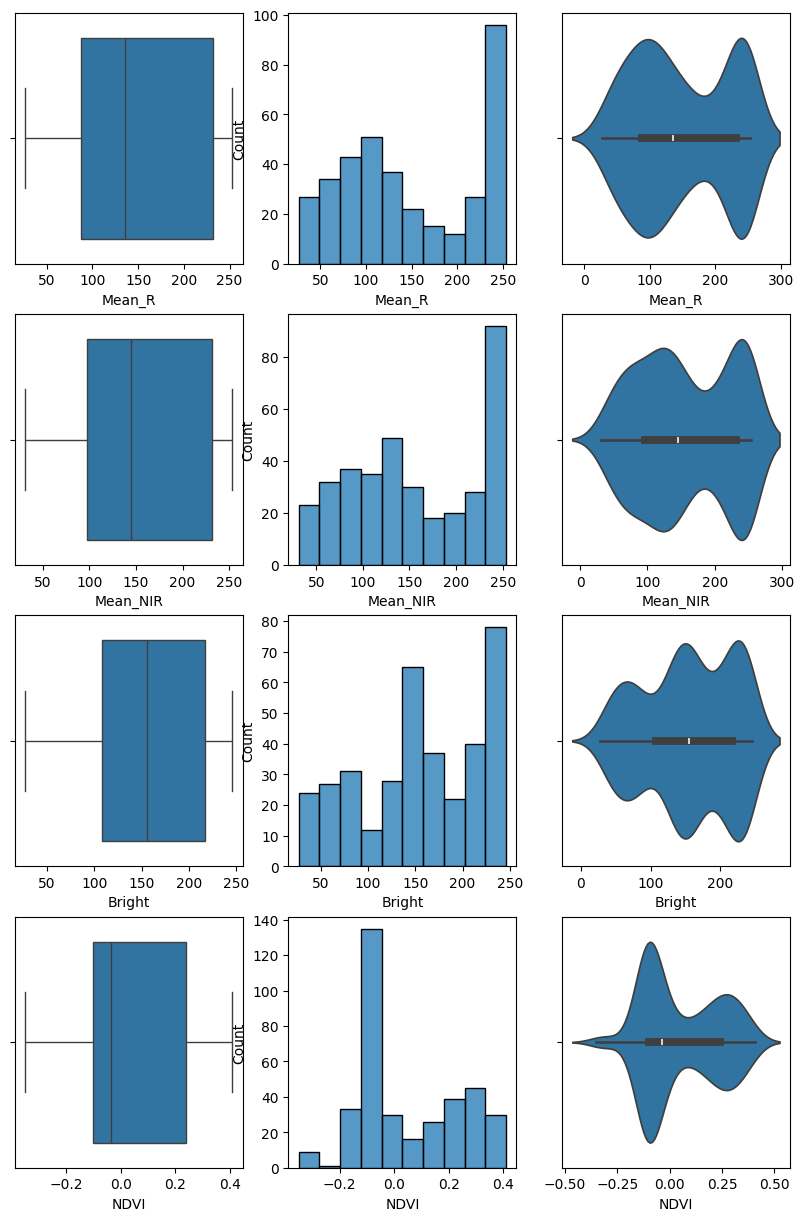

In [171]:
# Draw the distributions of the variables for cleaned data
f, axes = plt.subplots(4, 3, figsize=(10, 15))

count = 0
for var in top4_data_cleaned:
    sb.boxplot(data = top4_data_cleaned[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = top4_data_cleaned[var], ax = axes[count,1])
    sb.violinplot(data = top4_data_cleaned[var], orient = "h", ax = axes[count,2])
    count += 1

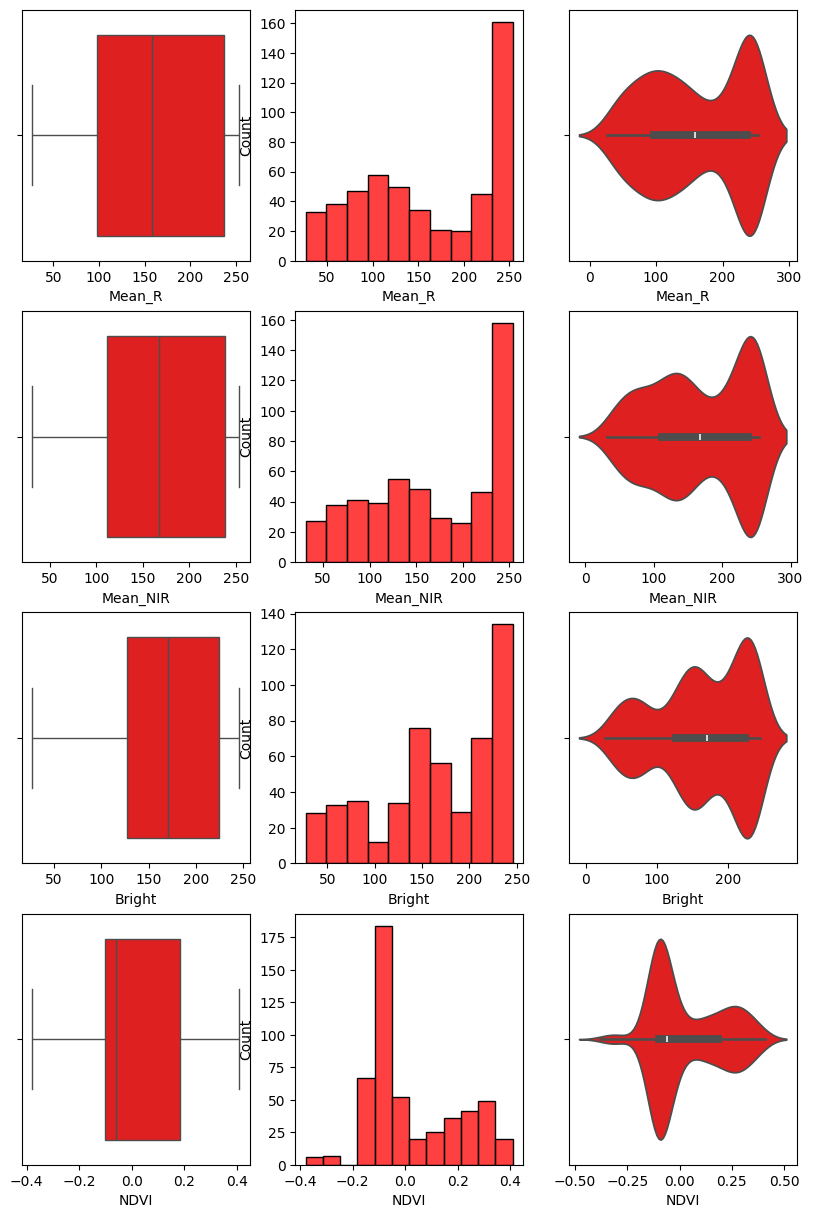

In [172]:
# Draw the distributions of the variables for cleaned data
f, axes = plt.subplots(4, 3, figsize=(10, 15))

count = 0
for var in top4_data_uncleaned:
    sb.boxplot(data = top4_data_uncleaned[var], orient = "h", ax = axes[count,0],color='red')
    sb.histplot(data = top4_data_uncleaned[var], ax = axes[count,1,],color='red')
    sb.violinplot(data = top4_data_uncleaned[var], orient = "h", ax = axes[count,2],color='red')
    count += 1

In [175]:
# Calculate the difference in summary statistics between the uncleaned and cleaned data for the top 4 features
difference_stats = top4_data_uncleaned.describe() - top4_data_cleaned.describe()

# Print the header for clarity
print("Difference in Statistics Between Original and Cleaned Data:")

# Display the calculated differences in summary statistics
print(difference_stats)


Difference in Statistics Between Original and Cleaned Data:
           Mean_R    Mean_NIR      Bright        NDVI
count  143.000000  143.000000  143.000000  143.000000
mean    12.278986   11.467628    9.670247   -0.022201
std      0.088206    0.047161   -0.348374   -0.011589
min      0.000000    0.000000    0.000000   -0.030000
25%      9.880000   14.632500   19.077500    0.000000
50%     22.385000   22.770000   14.975000   -0.025000
75%      5.030000    6.677500    7.877500   -0.055000
max      0.490000    0.050000    0.000000    0.000000


In [177]:
# Compare correlation matrices
print("Original Correlation Matrix:\n", top4_data_uncleaned.corr())
print("Cleaned Correlation Matrix:\n", top4_data_cleaned.corr()) 



Original Correlation Matrix:
             Mean_R  Mean_NIR    Bright      NDVI
Mean_R    1.000000  0.989272  0.971974 -0.511094
Mean_NIR  0.989272  1.000000  0.974658 -0.492076
Bright    0.971974  0.974658  1.000000 -0.312321
NDVI     -0.511094 -0.492076 -0.312321  1.000000
Cleaned Correlation Matrix:
             Mean_R  Mean_NIR    Bright      NDVI
Mean_R    1.000000  0.987872  0.967988 -0.492153
Mean_NIR  0.987872  1.000000  0.971473 -0.470004
Bright    0.967988  0.971473  1.000000 -0.277032
NDVI     -0.492153 -0.470004 -0.277032  1.000000


### Skewed data
Next, we create a layered histogram to see the distribution of the original and cleaned data. As we can see, the original data is more skewed compared to the cleaned.

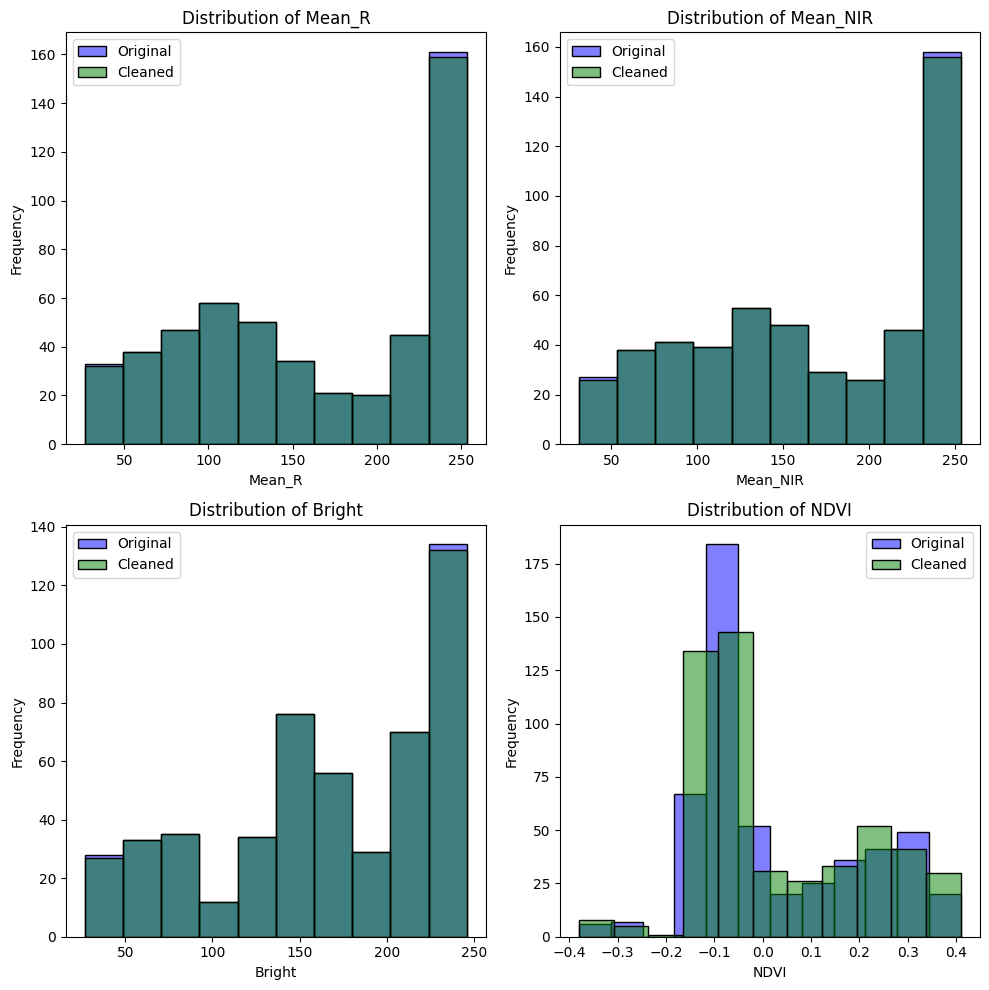

In [ ]:
# Define the list of variables to visualize
variables = ["Mean_R", "Mean_NIR", "Bright", "NDVI"]

# Create a 2x2 grid of subplots with a figure size of 10x10 for visualizing the variables
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()  # Flatten the grid of axes for easier iteration

# Loop through each variable and plot its distribution on the respective subplot
for i, var in enumerate(variables):
    # Plot the histogram of the original (uncleaned) data for the current variable
    sns.histplot(data=training_data[var], color='blue', alpha=0.5, label='Original', kde=False, ax=axes[i])
    
    # Plot the histogram of the cleaned data for the current variable on the same subplot
    sns.histplot(data=cleaned_train_df[var], color='green', alpha=0.5, label='Cleaned', kde=False, ax=axes[i])
    
    # Set the title, x-axis label, and y-axis label for the current subplot
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")
    
    # Add a legend to differentiate between the original and cleaned data
    axes[i].legend()

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the entire figure with all subplots
plt.show()


---
## Section 3: Model Selection and Hyperparameter Tuning

In this section, we focus on building and optimizing machine learning models to classify land cover types based on the selected features. The goal is to identify the best-performing model and fine-tune its hyperparameters for improved accuracy and generalization. We explore multiple classification algorithms, including Decision Tree, Random Forest, and K-Nearest Neighbors (KNN), each offering unique strengths in handling different data characteristics.

### Key Steps:
1. **Model Selection**:
   - We begin by implementing a baseline version of each model. The Decision Tree provides an interpretable structure for understanding feature importance, while the Random Forest leverages ensemble learning for robustness. The KNN classifier, being a distance-based method, offers flexibility in capturing non-linear patterns in the data.

2. **Data Standardization**:
   - For distance-based algorithms like KNN, feature scaling is crucial. We apply standardization to ensure that all features contribute equally to the distance calculations, preventing any single feature from dominating the results due to differing scales.

3. **Hyperparameter Tuning**:
   - To achieve optimal model performance, we utilize `GridSearchCV` for hyperparameter tuning. By systematically testing a range of parameter values (e.g., number of neighbors in KNN, maximum depth in Decision Tree), we identify the configuration that maximizes cross-validated accuracy. This process helps in refining the models and reducing the risk of overfitting.

4. **Evaluation**:
   - Each model is evaluated on the test dataset using metrics such as accuracy, precision, recall, and F1-score. We compare the performance of the models and analyze the results, highlighting the strengths and limitations of each approach.

Through this comprehensive approach, we aim to develop a robust classification model that can accurately distinguish between different land cover types. The insights gained from the model selection and tuning process will guide us in making data-driven decisions and improving the overall predictive power of the system.


### Decision Tree Classification

In this section, we implement a Decision Tree model to classify land cover types based on the selected key features: **Mean_R**, **Mean_NIR**, **Bright**, and **NDVI**. This is done utilizing: 

1. **Feature Selection and Target Encoding**: 
   - We start by defining the input features (`X`) using the four most important variables identified earlier.
   - The target variable (`y`) is set as the `class` column, which represents different land cover types.
   - We encode the target labels as numerical codes using categorical encoding, creating a mapping for easier interpretation of the predicted classes.

2. **Data Splitting**:
   - The dataset is split into training and testing sets using an 80-20 split. This ensures we have sufficient data for training while reserving a portion for evaluating the model's performance.

3. **Model Training and Prediction**:
   - We initialize a `DecisionTreeClassifier` with a specified `max_depth` to prevent overfitting.
   - The model is then trained on the training data (`fit()`), and predictions are made on the test set (`predict()`).

4. **Model Evaluation**:
   - We use a classification report to evaluate the performance of the model, providing metrics like precision, recall, and F1-score for each class.
   - Additionally, we analyze the feature importance scores generated by the Decision Tree model, which highlight the most influential variables in the classification process.

This section helps us build a baseline classification model, understand the predictive power of our selected features, and gain insights into the relative importance of each variable. The results will guide further refinement and potential improvements in the modeling process.

In [180]:
# Select the top 4 features for training the model
x_train = cleaned_train_df[["Mean_R", "Mean_NIR", "Bright", "NDVI"]]

# Set the target variable as the 'class' column from the cleaned DataFrame
y_train = cleaned_train_df['class']

# Encode the target variable as numeric codes using categorical encoding
# This transforms each unique class label into a numerical code (e.g., 0, 1, 2, ...)
y_train = y_train.astype('category').cat.codes

# Create a dictionary mapping of the original class labels to their corresponding numeric codes
label_mapping = dict(enumerate(cleaned_train_df['class'].astype('category').cat.categories))

# Print the label mapping for reference, showing the relationship between numeric codes and original class labels
print(label_mapping)


{0: 'asphalt ', 1: 'building ', 2: 'car ', 3: 'concrete ', 4: 'grass ', 5: 'pool ', 6: 'shadow ', 7: 'soil ', 8: 'tree '}


In [ ]:
# Split the data into training and testing setse
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split( x_train, y_train, test_size=0.2, random_state=42)

# Parameters:
# - test_size=0.2: Specifies that 20% of the data will be used for testing, and 80% for training.
# - random_state=42: Sets a seed for reproducibility


In [ ]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  

# Train (fit) the Decision Tree model using the training data
dt_model.fit(x_train_split, y_train_split)

# Make predictions on the test data using the trained model
y_pred_test = dt_model.predict(x_test_split)


In [181]:
# Print a header for clarity
print("Classification Report for Decision Tree:")

# Generate and print the classification report
print(classification_report(y_test_split, y_pred_test, zero_division=1))

# Extract feature importance scores from the trained Decision Tree model
feature_importances = dt_model.feature_importances_

# Create a DataFrame to display the feature importance scores
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Print a header for the feature importance section
print("Feature Importances:")

# Display the DataFrame sorted by importance scores in descending order
# This shows the most influential features at the top, helping to interpret the model
print(importance_df.sort_values(by='Importance', ascending=False))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.71      0.83        14
           2       0.00      0.00      0.00         2
           3       0.53      0.89      0.67         9
           4       0.88      0.58      0.70        12
           5       1.00      1.00      1.00         2
           6       0.89      1.00      0.94         8
           7       1.00      0.67      0.80         3
           8       0.78      0.88      0.82        16

    accuracy                           0.79        73
   macro avg       0.79      0.75      0.75        73
weighted avg       0.83      0.79      0.80        73

Feature Importances:
    Feature  Importance
3      NDVI    0.442020
2    Bright    0.283493
0    Mean_R    0.274487
1  Mean_NIR    0.000000


Overall, the Decision Tree model demonstrates good performance, with strong results for certain classes like asphalt and pool, which achieved perfect precision and recall. However, the model struggled with class 2, likely due to the small sample size (only 2 samples in the test set). The feature importance analysis highlights NDVI as a key discriminative variable, followed by brightness and the red band mean, while the lack of importance of the Near-Infrared band suggests room for improvement in feature selection. These findings provide valuable guidance for refining the model and improving its predictive capabilities in future iterations.

### Random Forest Classification

In this section, we implement a Random Forest classifier to classify land cover types using the selected key features: **Mean_R**, **Mean_NIR**, **Bright**, and **NDVI**. Random Forest is an ensemble learning method that builds multiple decision trees and aggregates their predictions, providing a more robust and accurate model compared to individual decision trees. The steps are:

1. **Feature Selection and Target Encoding**:
   - We begin by defining the input features (`x_train`) using the four most important variables identified earlier. The target variable (`y_train`) is set as the `class` column from the cleaned dataset.
   - The target labels are encoded as numerical codes using categorical encoding, which is necessary for training the classifier.

2. **Class Distribution Analysis**:
   - To understand the dataset composition, we print the initial distribution of class labels. This helps in identifying any class imbalances, which could potentially impact the model's performance.

3. **Label Mapping**:
   - A dictionary is created to map the original class labels to their respective numerical codes. This mapping is useful for interpreting the predictions of the model and understanding which numerical values correspond to specific land cover types.

4. **Data Splitting**:
   - We split the dataset into training and testing sets using an 80-20 split. The `train_test_split()` function is used with a fixed random state (`42`) to ensure reproducibility of the split.
   - The training set is used to build the Random Forest model, while the test set is reserved for evaluating the model’s performance.

By utilizing a Random Forest classifier, we aim to leverage the strength of ensemble methods, which combine the predictions of multiple trees to enhance accuracy and reduce overfitting. The analysis of class distribution and the use of label encoding ensure that the data is well-prepared for training, setting the stage for a reliable and interpretable classification model.


In [ ]:
# Convert the target variable (y_train) to categorical codes
y_train = y_train.astype('category').cat.codes


In [182]:
# Print a header for clarity when displaying the class distribution
print("Initial Class Distribution:")

# Display the distribution of the target variable (y_train)
print(dict(zip(*np.unique(y_train, return_counts=True))))


Initial Class Distribution:
{np.int8(0): np.int64(44), np.int8(1): np.int64(95), np.int8(2): np.int64(21), np.int8(3): np.int64(93), np.int8(4): np.int64(83), np.int8(5): np.int64(14), np.int8(6): np.int64(45), np.int8(7): np.int64(20), np.int8(8): np.int64(89)}


In [183]:
# Create a dictionary to map the encoded numeric class labels back to their original class names
label_mapping = dict(enumerate(cleaned_train_df['class'].astype('category').cat.categories))

# Print the label mapping dictionary to show the correspondence between numeric codes and original class labels
print(label_mapping)


{0: 'asphalt ', 1: 'building ', 2: 'car ', 3: 'concrete ', 4: 'grass ', 5: 'pool ', 6: 'shadow ', 7: 'soil ', 8: 'tree '}


In [184]:
# Split the dataset into training and testing sets
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Print a header for clarity when displaying the class distribution of the training set after the split
print("Training Set Class Distribution After Split:")

# Display the distribution of the target variable (y_train_split) in the training set
print(dict(zip(*np.unique(y_train_split, return_counts=True))))

Training Set Class Distribution After Split:
{np.int8(0): np.int64(27), np.int8(1): np.int64(56), np.int8(2): np.int64(7), np.int8(3): np.int64(32), np.int8(4): np.int64(50), np.int8(5): np.int64(9), np.int8(6): np.int64(31), np.int8(7): np.int64(12), np.int8(8): np.int64(67)}


In [185]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train (fit) the Random Forest model on the training data
model.fit(x_train_split, y_train_split)


RandomForestClassifier(random_state=42)

In [186]:
# Make predictions on the test data
y_pred_test = model.predict(x_test_split)

# Evaluate the model's performance on the test set
print("Classification Report on Test Data:")

# Generates a detailed performance report for the model, comparing the true labels (y_test_split) 
print(classification_report(y_test_split, y_pred_test, zero_division=1))

# Analyze feature importance 
feature_importances = model.feature_importances_

# Create a DataFrame to display the feature importance scores
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Print a header for the feature importance analysis
print("Feature Importances:")

# Display the feature importance scores, sorted in descending order
print(importance_df.sort_values(by='Importance', ascending=False))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.79      0.76      0.78        25
           2       0.25      0.50      0.33         2
           3       0.81      0.68      0.74        19
           4       0.71      0.88      0.79        17
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         9
           7       0.80      0.80      0.80         5
           8       0.83      0.62      0.71        16

    accuracy                           0.78       101
   macro avg       0.78      0.81      0.78       101
weighted avg       0.80      0.78      0.78       101

Feature Importances:
    Feature  Importance
3      NDVI    0.298168
0    Mean_R    0.276477
1  Mean_NIR    0.229419
2    Bright    0.195937


The model achieves good overall performance with an accuracy of 0.78. It performs exceptionally well for certain classes (e.g., 5 and 6), achieving perfect precision, recall, and F1-score. However, the model struggles with class 2, likely due to its low sample size (support of 2) and possible overlap with other classes in feature space. The feature importance analysis highlights NDVI as the most influential variable, followed by Mean_R and Mean_NIR, while Bright contributes the least among the selected features. These results suggest that the chosen features are generally effective for classification, but further refinement may be needed to improve performance for less represented classes.

### K-Nearest Neighbors

In this section, we implement the K-Nearest Neighbors (KNN) algorithm to classify land cover types based on the selected features. KNN is a simple yet powerful non-parametric classification method that makes predictions based on the majority vote of the nearest data points. It is particularly effective when the decision boundaries are complex and non-linear. The following steps are made: 

1. **Data Splitting**:
   - We start by splitting the dataset into training and testing sets using an 80-20 split ratio. The `stratify=y_train` parameter is used to maintain the same class distribution in both the training and testing sets, ensuring that the model is trained on a representative sample of the data.

2. **Label Encoding**:
   - We create a label mapping dictionary to translate the encoded numeric labels back to their original class names. This mapping is useful for interpreting the results of the KNN classifier.

3. **Data Standardization**:
   - Standardization is performed using `StandardScaler()` to scale the features. Since KNN relies on distance metrics to make predictions, it is crucial to standardize the input features. Standardization scales the features to have a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally to the distance calculations.

4. **Model Training**:
   - We initialize the KNN classifier with `n_neighbors=5`, meaning the model will consider the 5 nearest neighbors when making predictions. The classifier is then trained on the standardized training data.

5. **Model Evaluation**:
   - After training, we use the KNN model to make predictions on the standardized test data. The performance of the model is then evaluated using a classification report, which provides key metrics such as precision, recall, and F1-score for each class.

KNN is a versatile and interpretable algorithm, making it a good choice for this dataset. By using the distance-based approach, KNN can effectively capture complex decision boundaries. However, its performance heavily depends on the choice of the number of neighbors (`n_neighbors`) and the scaling of features. In this analysis, we focus on building a baseline model and evaluating its effectiveness, which may inform further tuning and optimization in future iterations.

In [ ]:
# Split the dataset into training and testing sets
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [188]:
# Create a dictionary to map numeric class labels back to their original categorical names
label_mapping = dict(enumerate(cleaned_train_df['class'].astype('category').cat.categories))

# Print the label mapping dictionary to display the relationship between numeric codes and original class labels
print(label_mapping)


{0: 'asphalt ', 1: 'building ', 2: 'car ', 3: 'concrete ', 4: 'grass ', 5: 'pool ', 6: 'shadow ', 7: 'soil ', 8: 'tree '}


In [191]:
# Initialize the Standard Scaler
scaler = StandardScaler()

# Standardize the training data
x_train_scaled = scaler.fit_transform(x_train_split)

# Standardize the testing data
x_test_scaled = scaler.transform(x_test_split)

# Initialize the k-Nearest Neighbors (KNN) classifier
model = KNeighborsClassifier(n_neighbors=5)

# Train (fit) the KNN model using the standardized training data
model.fit(x_train_scaled, y_train_split)

# Make predictions on the standardized test data
y_pred_test = model.predict(x_test_scaled)

# Evaluate the model's performance
print("Classification Report for k-Nearest Neighbors:")

#  Generates a detailed performance summary for the KNN model, comparing the true labels (y_test_split)
print(classification_report(y_test_split, y_pred_test))


Classification Report for k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.83      0.76      0.79        25
           2       0.00      0.00      0.00         2
           3       0.67      0.74      0.70        19
           4       0.74      0.82      0.78        17
           5       1.00      1.00      1.00         1
           6       1.00      0.78      0.88         9
           7       0.83      1.00      0.91         5
           8       0.79      0.69      0.73        16

    accuracy                           0.77       101
   macro avg       0.73      0.75      0.73       101
weighted avg       0.77      0.77      0.76       101



c:\Users\user\anaconda3\envs\SC1015\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\SC1015\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\SC1015\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


This means that KNN model demonstrates good overall performance, with an accuracy of 0.77. It performs particularly well for certain classes, such as 5 (pool), 6 (shadow), and 7 (soil), achieving perfect scores for these categories. However, the model struggles significantly with class 2, showing 0.00 for precision, recall, and F1-score. This poor performance is likely due to the small sample size and potential overlap with other classes. The high weighted average metrics indicate that the model performs well on classes with larger support, while the macro average highlights the challenges faced with less represented classes. These results suggest that while the KNN model is effective for most classes, additional tuning or data preprocessing might be needed to handle minority classes better.